# Time Series Data

### The Pandas Time Series Functionality 


We can showcase some of Pandas' time-series functionality by exploring the Bike Share dataset. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/mkleinbort/resource-datasets/master/bikeshare/bikeshare.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### An exploration of Temperature VS Time

To start with, let's plot it

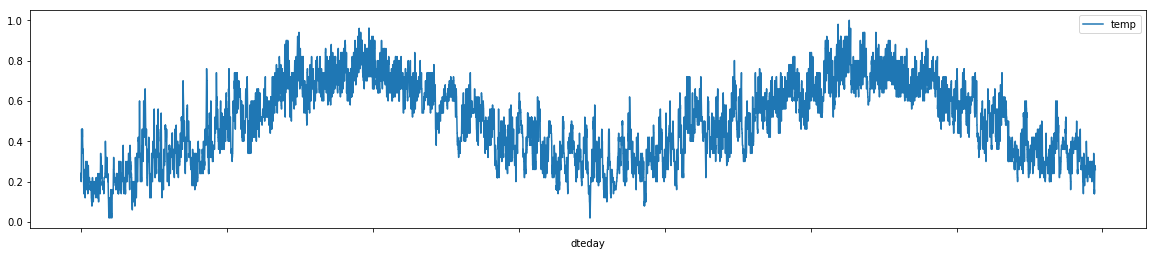

In [2]:
data.plot(x='dteday', y='temp', figsize=(20,4))

Not bad, but the plot has the following issues:
1. No x-axis labels
2. The x-axis is not "really" ordered, it's just that our dataset is chronological, this would fail if:
    - The data is not in order
    - The data is not at regular intervals

To showcase this issue, let's "skip" some rows in the dataset and plot it again

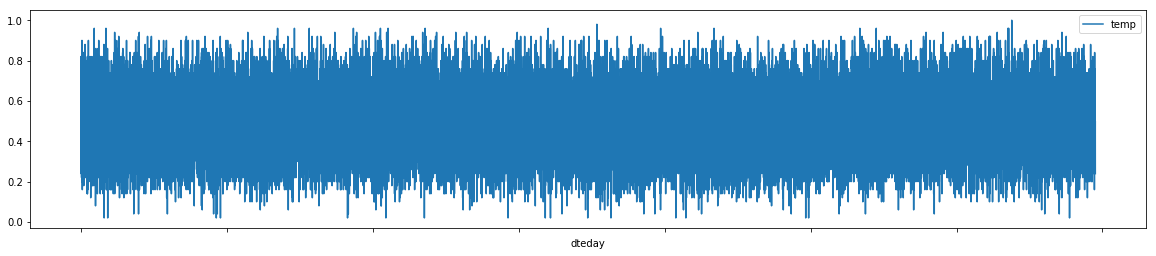

In [3]:
# This is what happens when the data is not in order
data.sample(len(data)).plot(x='dteday', y='temp', figsize=(20,4))

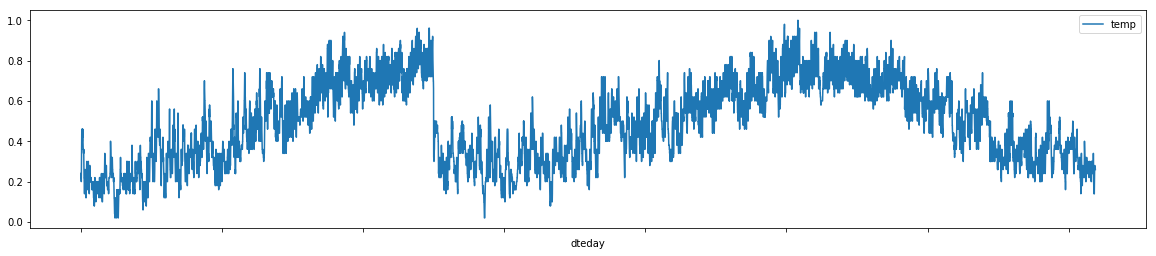

In [4]:
# This is what happens if we are "missing" a period of data
data.drop(range(5000,8000)).plot(x='dteday', y='temp', figsize=(20,4))

The solution: datetime objects

Python (and pandas) have a special data type called "datetime". It has many really useful features

In [5]:
date = pd.to_datetime('2011-01-01')
date

Timestamp('2011-01-01 00:00:00')

In [6]:
# Some date time functionality
{
 'date':        date,
 'year':        date.year,
 'month':       date.month,
 'day':         date.day, # of month
 'day of week': date.day_name(),
}

{'date': Timestamp('2011-01-01 00:00:00'),
 'year': 2011,
 'month': 1,
 'day': 1,
 'day of week': 'Saturday'}

datetime objects have more functionality, such as leap-year tracking, and minutes, hours etc...


In [7]:
# Let's create a proper date column
data['date'] = pd.to_datetime(data['dteday'])

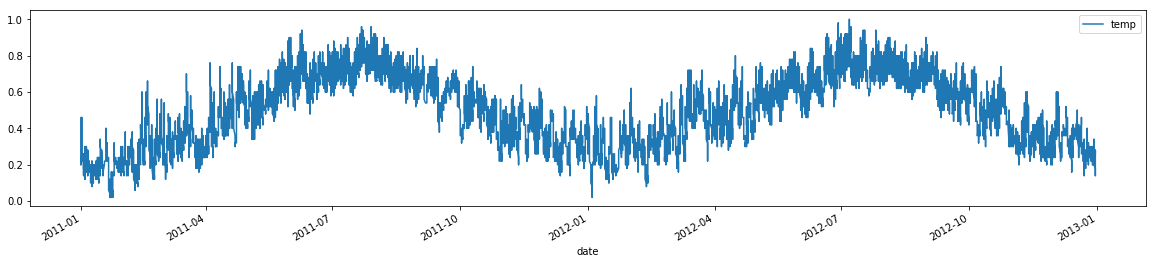

In [8]:
# Now we can get proper plots
data.plot(x='date', y='temp', figsize=(20,4))

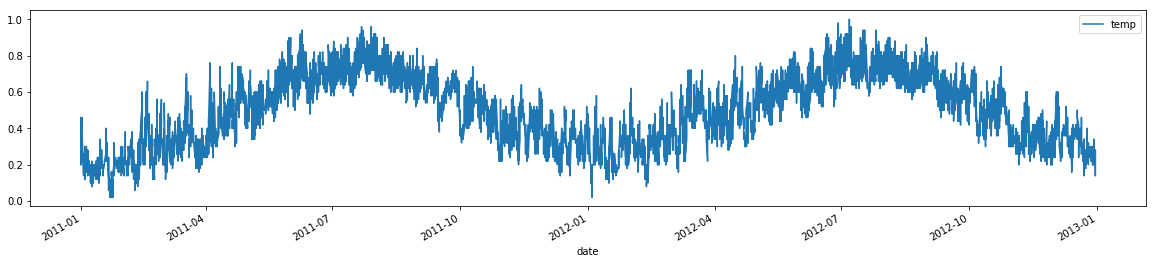

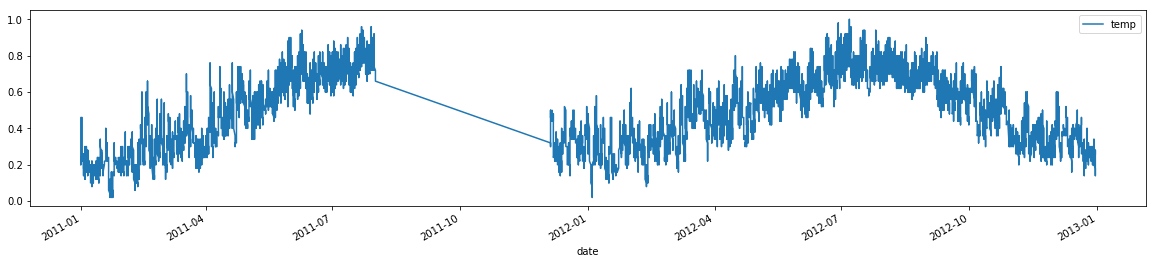

In [9]:
# Even in the bad scenarios we saw before

# It can unshuffle data
data.sample(len(data)).plot(x='date', y='temp', figsize=(20,4))

# It can handle missing periods
data.drop(range(5000,8000)).plot(x='date', y='temp', figsize=(20,4))

# Deeper Pandas Functionality

Perhaps the true power of datetime objects in pandas is only realized when it is used as the dataframe index. 


In [10]:
df = data.set_index('date')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
date,,,,,,,,,,,,,,,,,
2011-01-01,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Now you can "resample" the data. This is very similar to a groupby, but it understands things like "day" and "month"

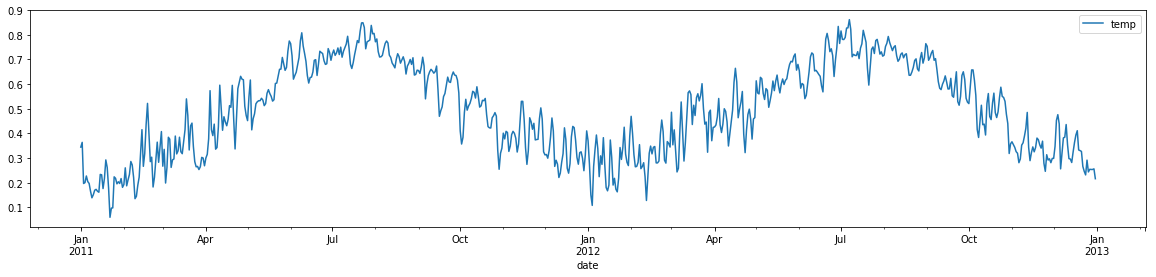

In [11]:
# This code computes the mean temperature per day and plots it
df.resample('D').mean().plot(y='temp', figsize=(20,4)) # D for day

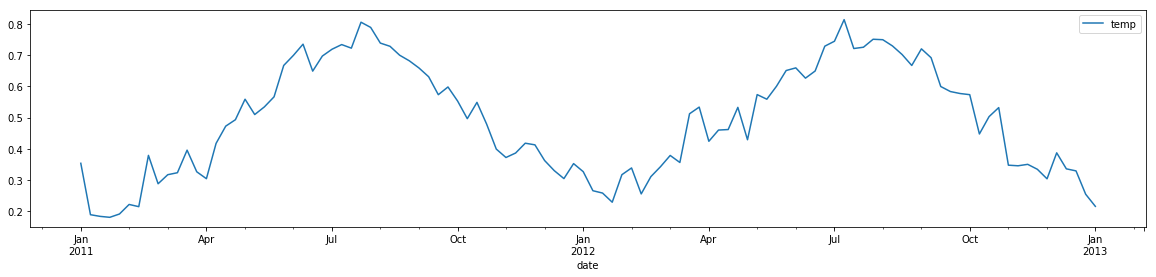

In [12]:
# This code computes the mean temperature per week and plots it
df.resample('W').mean().plot(y='temp', figsize=(20,4)) # W for week

# Now, for a puzzle - what is happening here:

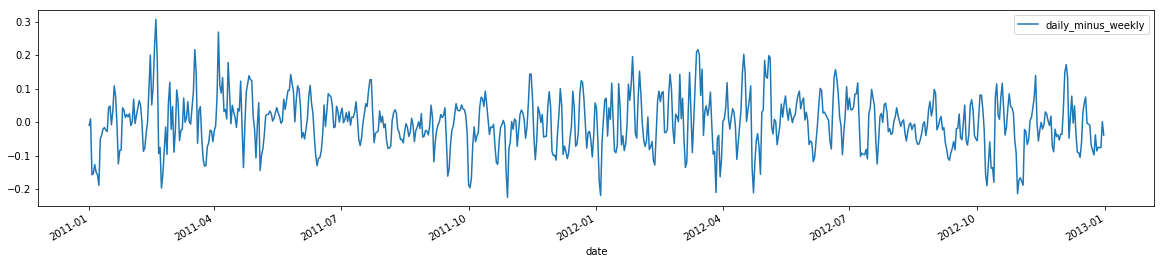

In [13]:
(df
 .assign(weekly_average_temp = lambda x: x.resample('W')['temp'].mean())
 .assign(daily_average_temp = lambda x: x.resample('D')['temp'].mean())
 .assign(weekly_average_temp_filled = lambda x: x['weekly_average_temp'].fillna(method='ffill').fillna(method='bfill'))
 .assign(daily_minus_weekly = lambda x: x['daily_average_temp'] - x['weekly_average_temp_filled'])
 .plot(y = 'daily_minus_weekly', figsize=(20,4))
)

Ans: naem erutarepmet ylkeew eht morf noitaived yliad eht s'tI

# Seasonality Discovery

The statsmodels library has some nice time series functionality (but I prefer Fb-Prophet)

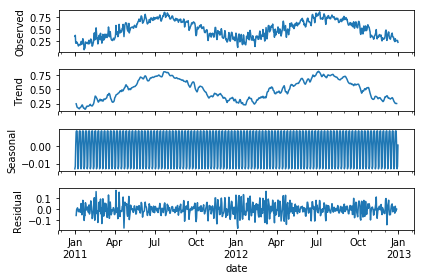

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.resample('D')['temp'].mean())
_ = decomposition.plot()


# Facebook Prophet

> This is a different dataset

In [15]:
 # !pip install fbprophet

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
data.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


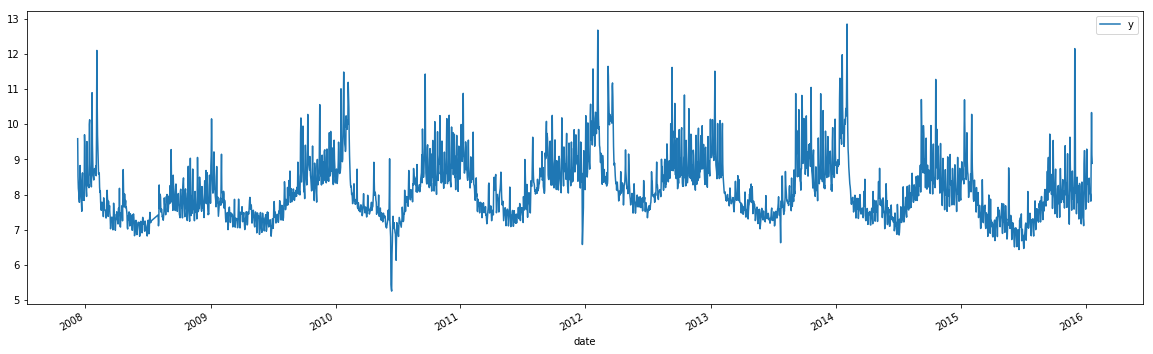

In [17]:
data.assign(date=lambda x: pd.to_datetime(x['ds'])).plot(x='date', y='y', figsize=(20,6))

In [18]:
from fbprophet import Prophet

model = Prophet()

model.fit(data)

future = model.make_future_dataframe(periods=365*3, include_history=False) # Three years!!!
future.head()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2016-01-21
1,2016-01-22
2,2016-01-23
3,2016-01-24
4,2016-01-25


In [19]:
predictions = model.predict(future)
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-21,7.558493,7.873032,9.162952,7.558493,7.558493,0.999819,0.999819,0.999819,-0.072254,-0.072254,-0.072254,1.072073,1.072073,1.072073,0.0,0.0,0.0,8.558312
1,2016-01-22,7.557465,7.967302,9.176183,7.557465,7.557465,1.016808,1.016808,1.016808,-0.069578,-0.069578,-0.069578,1.086386,1.086386,1.086386,0.0,0.0,0.0,8.574273
2,2016-01-23,7.556437,7.712010,8.980665,7.556437,7.556437,0.786528,0.786528,0.786528,-0.311713,-0.311713,-0.311713,1.098241,1.098241,1.098241,0.0,0.0,0.0,8.342965
3,2016-01-24,7.555410,8.110166,9.324395,7.555410,7.555410,1.155519,1.155519,1.155519,0.048276,0.048276,0.048276,1.107243,1.107243,1.107243,0.0,0.0,0.0,8.710929
4,2016-01-25,7.554382,8.353442,9.627709,7.554382,7.554382,1.465276,1.465276,1.465276,0.352295,0.352295,0.352295,1.112981,1.112981,1.112981,0.0,0.0,0.0,9.019658


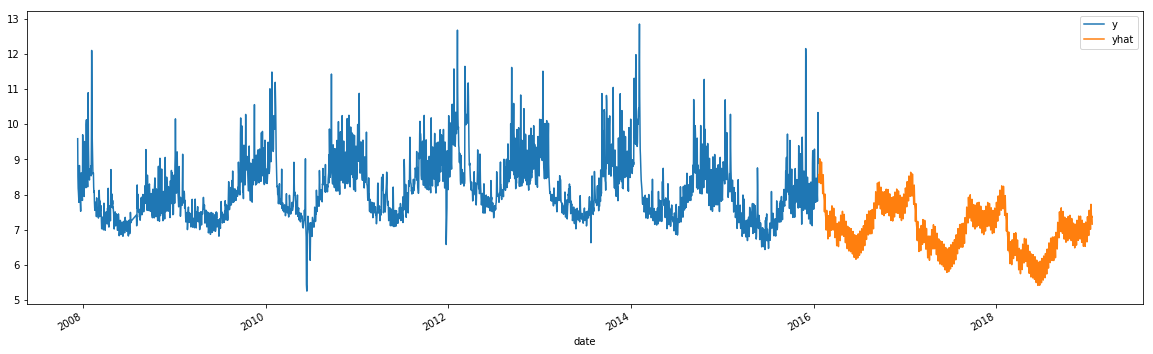

In [20]:
# plotting the historical data (in blue)
ax = (data
      .assign(date=lambda x: pd.to_datetime(x['ds']))
      .plot(x='date',y='y', figsize=(20,6))
     )

# plotting the forecasted data
(predictions
      .assign(date=lambda x: pd.to_datetime(x['ds']))
      .plot(x='date',y='yhat', ax=ax)
)


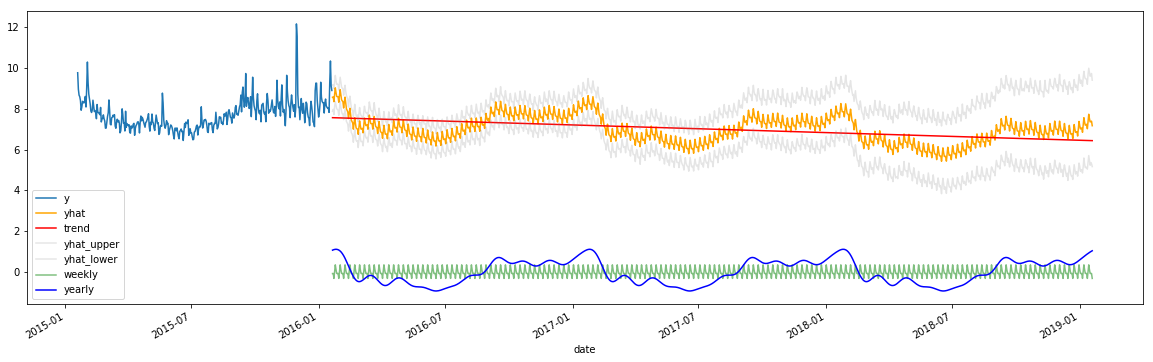

In [21]:
# plotting the various components of the prediction

ax = (data
      .assign(date=lambda x: pd.to_datetime(x['ds']))
      .tail(365)
      .plot(x='date',y='y', figsize=(20,6))
     )

df = predictions.assign(date=lambda x: pd.to_datetime(x['ds']))

# Predictions
df.plot(x='date',y='yhat', color='orange', ax=ax)

# Trend
df.plot(x='date',y='trend', color='red', ax=ax)

# Upper and Lower Estimates (the model is 95% confident the true value will be between these)
df.plot(x='date',y='yhat_upper', color='gray', ax=ax, alpha=0.2)
df.plot(x='date',y='yhat_lower', color='gray', ax=ax, alpha=0.2)

# The Weekly Pattern
df.plot(x='date',y='weekly', color='green', ax=ax, alpha=0.5)

# The yearly Pattern
df.plot(x='date',y='yearly', color='blue', ax=ax)


# If we apply this to the bicycle dataset

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/mkleinbort/resource-datasets/master/bikeshare/bikeshare.csv')
data['ds'] = data['dteday']
data['y'] = data['temp']

data = data[['ds','y']]

In [23]:
# The WHOLE of the ML process

from fbprophet import Prophet
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365*3, include_history=False) # 3 Years!
predictions = model.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


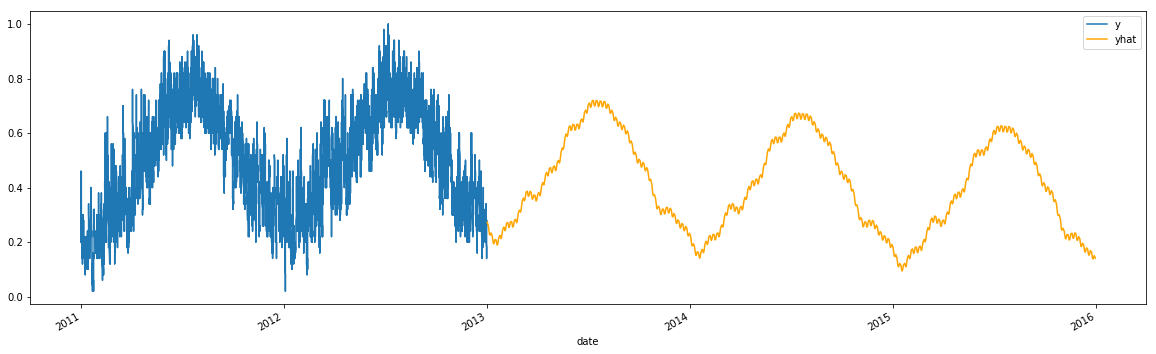

In [24]:
# plotting the various components of the prediction

ax = (data
      .assign(date=lambda x: pd.to_datetime(x['ds']))
      .plot(x='date',y='y', figsize=(20,6))
     )

df = predictions.assign(date=lambda x: pd.to_datetime(x['ds']))

# Predictions
df.plot(x='date',y='yhat', color='orange', ax=ax)

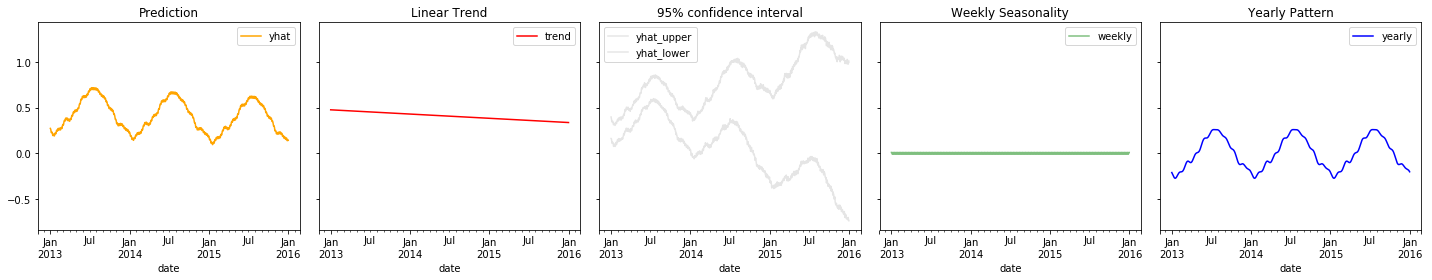

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=5, nrows=1, sharey=True)
fig.set_size_inches(20,4)

# Prediction
df.plot(x='date',y='yhat', color='orange', title='Prediction', ax=axes[0])

# Trend
df.plot(x='date',y='trend', color='red', ax=axes[1], title='Linear Trend')

# Upper and Lower Estimates (the model is 95% confident the true value will be between these)
df.plot(x='date',y='yhat_upper', color='gray', alpha=0.2, ax=axes[2], title='95% confidence interval')
df.plot(x='date',y='yhat_lower', color='gray', alpha=0.2, ax=axes[2])

# The Weekly Pattern
df.plot(x='date',y='weekly', color='green', ax=axes[3], alpha=0.5, title='Weekly Seasonality')


# The yearly Pattern
df.plot(x='date',y='yearly', color='blue', ax=axes[4], title='Yearly Pattern')


plt.tight_layout()

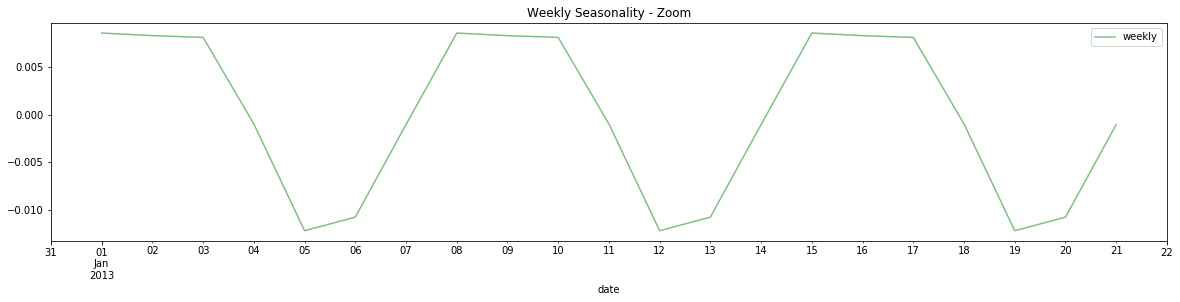

In [26]:
# The Weekly Pattern - Zoomed In
df.head(21).plot(x='date',y='weekly', color='green', alpha=0.5, title='Weekly Seasonality - Zoom', figsize=(20,4))


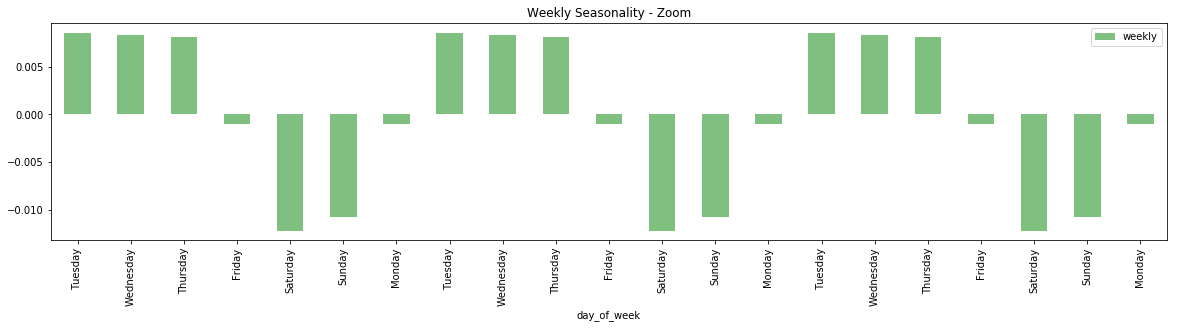

In [27]:
# The weekly seasonality again, but with week day names
(df
 .assign(day_of_week = lambda x: pd.to_datetime(x['ds']).dt.day_name())
 .head(21)
 .plot(x='day_of_week', y='weekly', kind='bar', figsize=(20,4), title='Weekly Seasonality - Zoom', color='green', alpha=0.5)
)